In [ ]:
pip install keras_ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 55.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=4ab318d15ddfcab15ff8a2c53fafdadb0589682f05166de322f637f7bdfaa3c9
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
import os
from tqdm import tqdm

In [ ]:
#General Approach.....
#Use keras OCR to detect text, define a mask around the text, and inpaint the
#masked regions to remove the text.
#To apply the mask we need to provide the coordinates of the starting and
#the ending points of the line, and the thickness of the line

#The start point will be the mid-point between the top-left corner and
#the bottom-left corner of the box.
#the end point will be the mid-point between the top-right corner and the bottom-right corner.
#The following function does exactly that.
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [ ]:
#Main function that detects text and inpaints.
#Inputs are the image path and kreas_ocr pipeline

def inpaint_text(img_path, pipeline):
    # global inpainted_img
    # read the image
    img = keras_ocr.tools.read(img_path)

    # Recogize text (and corresponding regions)
    # Each list of predictions in prediction_groups is a list of
    # (word, box) tuples.
    prediction_groups = pipeline.recognize([img])
    # print("yes")
    # print(prediction_groups)
    #Define the mask for inpainting
    mask = np.zeros(img.shape[:2], dtype="uint8")
    if len(prediction_groups[0]) ==0:
      return None
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]

        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

        #For the line thickness, we will calculate the length of the line between
        #the top-left corner and the bottom-left corner.
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

        #Define the line and inpaint
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,
        thickness)
        inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
    return(inpainted_img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
new_lst=[]
j = 0
for i in os.listdir("/content/drive/MyDrive/MAMI_dataset"):
  j+=1
  new_lst.append(i)
print(j)

10009


In [ ]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
new_lst2=[]
j = 0
for i in os.listdir("/content/drive/MyDrive/mami_wc_train"):
  j+=1
  new_lst2.append(i)
print(j)

pipeline = keras_ocr.pipeline.Pipeline()
new_lst_3 = []
for i in tqdm(new_lst):
  if i not in new_lst2:
    print(i)
    img_text_removed = inpaint_text('/content/drive/MyDrive/MAMI_dataset/' + i, pipeline)
    # print(i)
    if img_text_removed is not None:
      cv2.imwrite('/content/drive/MyDrive/mami_wc_train/' + i, cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))
    else:
      new_lst_3.append(i)
  # break

0
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/10009 [00:00<?, ?it/s]

2754.jpg
1/1 [==============================] - 3s 3s/step


  0%|          | 1/10009 [00:25<71:39:46, 25.78s/it]

11596.jpg
1/1 [==============================] - 1s 1s/step


  0%|          | 2/10009 [00:38<51:01:29, 18.36s/it]

8563.jpg
1/1 [==============================] - 2s 2s/step


  0%|          | 3/10009 [00:55<48:40:16, 17.51s/it]

2931.jpg
1/1 [==============================] - 1s 1s/step


  0%|          | 4/10009 [01:06<41:41:19, 15.00s/it]

5573.jpg
1/1 [==============================] - 2s 2s/step


  0%|          | 5/10009 [01:20<40:12:18, 14.47s/it]

8598.jpg
1/1 [==============================] - 2s 2s/step


  0%|          | 6/10009 [01:39<44:55:49, 16.17s/it]

5019.jpg
1/1 [==============================] - 2s 2s/step


  0%|          | 7/10009 [01:57<46:37:38, 16.78s/it]

7109.jpg
1/1 [==============================] - 0s 95ms/step


  0%|          | 8/10009 [02:10<42:47:04, 15.40s/it]

8085.jpg
1/1 [==============================] - 1s 1s/step


  0%|          | 9/10009 [02:19<37:14:49, 13.41s/it]

11522.jpg
1/1 [==============================] - 0s 66ms/step


  0%|          | 10/10009 [02:34<39:11:32, 14.11s/it]

744.jpg
1/1 [==============================] - 1s 732ms/step


  0%|          | 11/10009 [02:45<35:56:57, 12.94s/it]

9469.jpg
1/1 [==============================] - 1s 1s/step


  0%|          | 12/10009 [02:53<32:06:15, 11.56s/it]

4593.jpg
1/1 [==============================] - 0s 56ms/step


  0%|          | 13/10009 [03:04<31:28:28, 11.34s/it]

9227.jpg
1/1 [==============================] - 2s 2s/step


  0%|          | 14/10009 [03:18<33:28:29, 12.06s/it]

5653.jpg
1/1 [==============================] - 0s 94ms/step


  0%|          | 15/10009 [03:32<35:07:59, 12.66s/it]

10792.jpg
1/1 [==============================] - 0s 97ms/step


  0%|          | 16/10009 [03:44<34:45:57, 12.52s/it]

4256.jpg
1/1 [==============================] - 2s 2s/step


  0%|          | 17/10009 [03:49<28:52:40, 10.40s/it]

8761.jpg
1/1 [==============================] - 0s 45ms/step


  0%|          | 18/10009 [03:59<28:42:02, 10.34s/it]

10057.jpg
1/1 [==============================] - 0s 61ms/step


  0%|          | 19/10009 [04:11<29:46:01, 10.73s/it]

1760.jpg
1/1 [==============================] - 1s 924ms/step


  0%|          | 20/10009 [04:19<27:05:15,  9.76s/it]

10037.jpg
1/1 [==============================] - 1s 933ms/step


  0%|          | 21/10009 [04:32<29:43:23, 10.71s/it]

10455.jpg
1/1 [==============================] - 0s 67ms/step


  0%|          | 22/10009 [04:47<33:57:58, 12.24s/it]

3628.jpg
1/1 [==============================] - 2s 2s/step


  0%|          | 23/10009 [04:55<30:31:26, 11.00s/it]

3338.jpg
1/1 [==============================] - 0s 43ms/step


  0%|          | 24/10009 [05:05<28:53:33, 10.42s/it]

1722.jpg
2/2 [==============================] - 3s 303ms/step


  0%|          | 25/10009 [05:27<38:48:50, 14.00s/it]

10629.jpg
2/2 [==============================] - 0s 91ms/step


  0%|          | 26/10009 [05:49<45:23:17, 16.37s/it]

10000.jpg
1/1 [==============================] - 1s 653ms/step


  0%|          | 27/10009 [05:56<37:31:31, 13.53s/it]

3038.jpg
1/1 [==============================] - 0s 96ms/step


  0%|          | 28/10009 [06:14<41:44:33, 15.06s/it]

6954.jpg
1/1 [==============================] - 1s 1s/step


  0%|          | 29/10009 [06:30<41:58:17, 15.14s/it]

8872.jpg
1/1 [==============================] - 1s 611ms/step


  0%|          | 30/10009 [06:37<35:51:52, 12.94s/it]

11059.jpg
1/1 [==============================] - 1s 1s/step


  0%|          | 31/10009 [06:51<36:23:37, 13.13s/it]

3543.jpg
1/1 [==============================] - 0s 57ms/step


  0%|          | 32/10009 [06:56<29:43:31, 10.73s/it]

11498.jpg
3/3 [==============================] - 0s 51ms/step


  0%|          | 33/10009 [07:50<65:34:38, 23.66s/it]

344.jpg
1/1 [==============================] - 0s 61ms/step


  0%|          | 34/10009 [08:02<56:07:42, 20.26s/it]

6591.jpg
2/2 [==============================] - 1s 458ms/step


  0%|          | 35/10009 [08:11<46:45:08, 16.87s/it]

2029.jpg
2/2 [==============================] - 2s 2s/step


  0%|          | 36/10009 [08:44<60:02:38, 21.67s/it]

6377.jpg
1/1 [==============================] - 0s 61ms/step


  0%|          | 37/10009 [08:47<44:24:23, 16.03s/it]

2096.jpg
1/1 [==============================] - 0s 45ms/step


  0%|          | 38/10009 [08:58<40:28:23, 14.61s/it]

8907.jpg
1/1 [==============================] - 2s 2s/step


  0%|          | 39/10009 [09:14<41:24:35, 14.95s/it]

7836.jpg
1/1 [==============================] - 0s 96ms/step


  0%|          | 40/10009 [09:27<39:31:41, 14.27s/it]

3980.jpg
1/1 [==============================] - 0s 43ms/step


  0%|          | 41/10009 [09:29<29:17:02, 10.58s/it]

11317.jpg
1/1 [==============================] - 0s 64ms/step


  0%|          | 42/10009 [09:42<31:15:05, 11.29s/it]

6091.jpg
1/1 [==============================] - 0s 66ms/step


  0%|          | 43/10009 [09:49<27:53:37, 10.08s/it]

6743.jpg
2/2 [==============================] - 2s 2s/step


  0%|          | 44/10009 [10:10<37:11:57, 13.44s/it]

7385.jpg
2/2 [==============================] - 0s 32ms/step


  0%|          | 45/10009 [10:24<37:43:56, 13.63s/it]

11711.jpg
1/1 [==============================] - 0s 58ms/step


  0%|          | 46/10009 [10:31<31:51:56, 11.51s/it]

11494.jpg
1/1 [==============================] - 2s 2s/step


  0%|          | 47/10009 [10:47<35:44:28, 12.92s/it]

10995.jpg
1/1 [==============================] - 0s 64ms/step


  0%|          | 48/10009 [10:55<31:38:09, 11.43s/it]

1274.jpg
2/2 [==============================] - 0s 37ms/step


  0%|          | 49/10009 [11:13<36:43:22, 13.27s/it]

11520.jpg
3/3 [==============================] - 0s 46ms/step


  0%|          | 50/10009 [11:30<39:54:14, 14.42s/it]

727.jpg
1/1 [==============================] - 1s 712ms/step


  1%|          | 51/10009 [11:37<33:58:01, 12.28s/it]

6805.jpg
1/1 [==============================] - 0s 39ms/step


  1%|          | 52/10009 [11:46<31:16:49, 11.31s/it]

4426.jpg
1/1 [==============================] - 2s 2s/step


  1%|          | 53/10009 [11:56<29:59:18, 10.84s/it]

1536.jpg
1/1 [==============================] - 0s 62ms/step


  1%|          | 54/10009 [12:09<31:45:27, 11.48s/it]

5326.jpg
1/1 [==============================] - 0s 66ms/step


  1%|          | 55/10009 [12:21<32:31:49, 11.77s/it]

9392.jpg
1/1 [==============================] - 0s 47ms/step


  1%|          | 56/10009 [12:24<25:02:34,  9.06s/it]

2210.jpg
1/1 [==============================] - 0s 69ms/step


  1%|          | 57/10009 [12:37<28:23:11, 10.27s/it]

6452.jpg
1/1 [==============================] - 0s 64ms/step


  1%|          | 58/10009 [12:43<25:07:32,  9.09s/it]

4438.jpg
1/1 [==============================] - 0s 121ms/step


  1%|          | 59/10009 [12:58<30:04:41, 10.88s/it]

1110.jpg
1/1 [==============================] - 0s 100ms/step


  1%|          | 60/10009 [13:14<34:05:54, 12.34s/it]

8877.jpg
2/2 [==============================] - 0s 19ms/step


  1%|          | 61/10009 [13:28<35:44:43, 12.94s/it]

4645.jpg
1/1 [==============================] - 0s 49ms/step


  1%|          | 62/10009 [13:34<29:57:15, 10.84s/it]

7476.jpg
1/1 [==============================] - 2s 2s/step


  1%|          | 63/10009 [13:52<35:36:28, 12.89s/it]

1287.jpg
1/1 [==============================] - 0s 95ms/step


  1%|          | 64/10009 [14:09<38:38:37, 13.99s/it]

4504.jpg
1/1 [==============================] - 0s 63ms/step


  1%|          | 65/10009 [14:20<36:52:13, 13.35s/it]

9007.jpg
1/1 [==============================] - 0s 65ms/step


  1%|          | 66/10009 [14:33<36:03:37, 13.06s/it]

3873.jpg
1/1 [==============================] - 0s 66ms/step


  1%|          | 67/10009 [14:47<36:41:16, 13.28s/it]

3789.jpg
1/1 [==============================] - 0s 61ms/step


  1%|          | 68/10009 [14:55<32:14:36, 11.68s/it]

8408.jpg
1/1 [==============================] - 0s 66ms/step


  1%|          | 69/10009 [15:03<29:32:23, 10.70s/it]

9137.jpg
2/2 [==============================] - 0s 81ms/step


  1%|          | 70/10009 [15:26<39:39:16, 14.36s/it]

5521.jpg
1/1 [==============================] - 0s 64ms/step


  1%|          | 71/10009 [15:39<38:35:15, 13.98s/it]

6517.jpg
2/2 [==============================] - 0s 60ms/step


  1%|          | 72/10009 [15:52<38:11:02, 13.83s/it]

9818.jpg
1/1 [==============================] - 0s 103ms/step


  1%|          | 73/10009 [16:07<38:41:10, 14.02s/it]

6806.jpg
1/1 [==============================] - 0s 97ms/step


  1%|          | 74/10009 [16:24<41:37:16, 15.08s/it]

5613.jpg
1/1 [==============================] - 0s 67ms/step


  1%|          | 75/10009 [16:28<32:06:26, 11.64s/it]

2370.jpg
1/1 [==============================] - 0s 58ms/step


  1%|          | 76/10009 [16:33<26:09:03,  9.48s/it]

5885.jpg
1/1 [==============================] - 0s 64ms/step


  1%|          | 77/10009 [16:47<30:17:13, 10.98s/it]

11512.jpg
1/1 [==============================] - 0s 100ms/step


  1%|          | 78/10009 [17:00<31:59:34, 11.60s/it]

4987.jpg
1/1 [==============================] - 0s 66ms/step


  1%|          | 79/10009 [17:04<25:41:39,  9.32s/it]

7868.jpg
1/1 [==============================] - 0s 45ms/step


  1%|          | 80/10009 [17:11<23:43:50,  8.60s/it]

9987.jpg
2/2 [==============================] - 0s 383ms/step


  1%|          | 81/10009 [17:21<24:34:09,  8.91s/it]

7418.jpg
1/1 [==============================] - 0s 78ms/step


  1%|          | 82/10009 [17:32<26:53:40,  9.75s/it]

3154.jpg
1/1 [==============================] - 0s 77ms/step


  1%|          | 83/10009 [17:47<30:58:20, 11.23s/it]

4149.jpg
3/3 [==============================] - 0s 81ms/step


  1%|          | 84/10009 [18:18<47:33:48, 17.25s/it]

10417.jpg
1/1 [==============================] - 0s 96ms/step


  1%|          | 85/10009 [18:33<45:35:16, 16.54s/it]

9693.jpg
1/1 [==============================] - 0s 60ms/step


  1%|          | 86/10009 [18:44<40:50:23, 14.82s/it]

4890.jpg
1/1 [==============================] - 0s 61ms/step


  1%|          | 87/10009 [18:52<35:21:05, 12.83s/it]

6230.jpg
1/1 [==============================] - 2s 2s/step


  1%|          | 88/10009 [19:08<37:58:11, 13.78s/it]

4217.jpg
1/1 [==============================] - 0s 67ms/step


  1%|          | 89/10009 [19:11<28:34:59, 10.37s/it]

2108.jpg
1/1 [==============================] - 0s 33ms/step


  1%|          | 90/10009 [19:17<25:05:09,  9.10s/it]

10352.jpg
1/1 [==============================] - 0s 70ms/step


  1%|          | 91/10009 [19:27<25:43:54,  9.34s/it]

4924.jpg
2/2 [==============================] - 0s 61ms/step


  1%|          | 92/10009 [19:37<26:43:51,  9.70s/it]

6773.jpg
1/1 [==============================] - 0s 45ms/step


  1%|          | 93/10009 [19:45<25:02:12,  9.09s/it]

9813.jpg
1/1 [==============================] - 0s 46ms/step


  1%|          | 94/10009 [19:47<19:36:21,  7.12s/it]

1345.jpg
1/1 [==============================] - 0s 62ms/step


  1%|          | 95/10009 [20:00<23:49:44,  8.65s/it]

3512.jpg
1/1 [==============================] - 0s 63ms/step


  1%|          | 96/10009 [20:12<27:11:39,  9.88s/it]

5533.jpg
1/1 [==============================] - 0s 50ms/step


  1%|          | 97/10009 [20:19<24:47:47,  9.01s/it]

1270.jpg
1/1 [==============================] - 0s 63ms/step


  1%|          | 98/10009 [20:22<19:43:45,  7.17s/it]

8929.jpg
4/4 [==============================] - 0s 52ms/step


  1%|          | 99/10009 [21:17<58:55:33, 21.41s/it]

1539.jpg
1/1 [==============================] - 0s 96ms/step


  1%|          | 100/10009 [21:33<54:46:31, 19.90s/it]

7696.jpg
1/1 [==============================] - 2s 2s/step


  1%|          | 101/10009 [21:47<49:23:44, 17.95s/it]

1888.jpg
1/1 [==============================] - 0s 97ms/step


  1%|          | 102/10009 [22:08<52:34:54, 19.11s/it]

9751.jpg
1/1 [==============================] - 0s 51ms/step


  1%|          | 103/10009 [22:18<44:41:27, 16.24s/it]

10120.jpg
1/1 [==============================] - 0s 54ms/step


  1%|          | 103/10009 [22:19<35:47:03, 13.00s/it]


KeyboardInterrupt: ignored

In [ ]:
print(new_lst_3)

['ravan250.png', 'ravan334.png']


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step


True

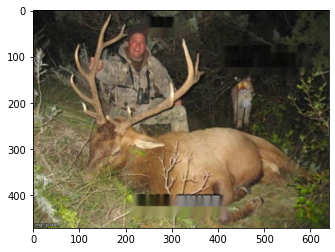

In [ ]:
# # keras-ocr will automatically download pretrained
# # weights for the detector and recognizer.
# pipeline = keras_ocr.pipeline.Pipeline()

# img_text_removed = inpaint_text('/content/sample_data/3.jpg', pipeline)

# plt.imshow(img_text_removed)

# cv2.imwrite('/content/sample_data/new_folder/text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))